**7/03_課題06**  
1922076 南 昂汰 G4

## 課題6-1. 引数に、(関数, 級数の数n, 区間開始点、区間終了点)を取る、フーリエ級数展開を行う関数fseを作り、関数y = -(x - 3) ** 2 + 9をフーリエ級数展開によって近似せよ。条件は上と同じで、区間は[0,6]とする。n=1から5までの結果をグラフで示せ。

In [ ]:
!apt-get install imagemagick

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math

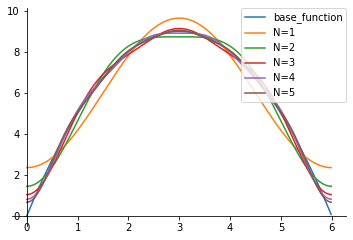

In [3]:
def fse(func,N,start,T):
  dx = 0.01
  x = np.arange(start, T, dx)
  y_base = func(x)
  a0 = 2 * np.average(y_base)
  y_ave = np.array([a0 / 2 for xi in x]) 
  box = [y_ave]
  for n in range(1, N+1):
    cos_n = np.cos(2*np.pi*n*x/T)
    sin_n = np.sin(2*np.pi*n*x/T)
    a_n = (2/T)*np.dot(y_base, cos_n)*dx 
    b_n = (2/T)*np.dot(y_base, sin_n)*dx
    y_cos_n = a_n*np.cos(2*np.pi*n/T*x)
    y_sin_n = b_n*np.sin(2*np.pi*n/T*x)
    y_total = y_cos_n + y_sin_n
    box.append(y_total + box[n-1])
      
  fig = plt.figure(figsize=(6,4))
  ax = fig.add_subplot(1,1,1) 

  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')

  ax.plot(x, y_base, label='base_function')
  ax.plot(x, box[1] , label='N=1')
  ax.plot(x, box[2] , label='N=2')
  ax.plot(x, box[3] , label='N=3')
  ax.plot(x, box[4] , label='N=4')
  ax.plot(x, box[5] , label='N=5')
  ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)

fse(lambda x:-(x-3)**2+9,5,0,6.0)

## 課題6-2. 6-1で作った関数でnを増加させて元の関数に近似させていく様子をアニメーションにする関数fse_aniを作り、動画を作成せよ。入力する関数は変更しても良い。

In [4]:
def here_function(x):
  y = -(x - 3) ** 2 + 9
  return y

def fse_ani(N,start,T):
  dx = 0.01
  x = np.arange(start, T, dx)
  y_base = here_function(x)
  
  a0 = 2 * np.average(y_base)
  y_ave = np.array([a0 / 2 for xi in x]) 
  
  fig = plt.figure(figsize=(6,4)) 
  ax = fig.add_subplot(1,1,1) 
  
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  
  ax.plot(x, y_base, label='base_function')
  
  box = [y_ave]
  artist_list = []

  for n in range(1, N+1):
    cos_n = np.cos(2*np.pi*n*x/T)
    sin_n = np.sin(2*np.pi*n*x/T)
    a_n = (2/T)*np.dot(y_base, cos_n)*dx 
    b_n = (2/T)*np.dot(y_base, sin_n)*dx
    y_cos_n = a_n*np.cos(2*np.pi*n/T*x)
    y_sin_n = b_n*np.sin(2*np.pi*n/T*x)
    y_total = y_cos_n + y_sin_n
    box.append(y_total + box[n-1])
    art = ax.plot(x, box[n-1], label='N=1')
    artist_list.append(art)

  ani = ArtistAnimation(fig, artist_list, interval = 600)
  plt.close()
  display(HTML(ani.to_jshtml()))
  ani.save('./data_and_math_6_2.mp4', writer="ffmpeg")

fse_ani(5,0,6)

## オプション課題6-3. f(x) = {1 (0<x<π), 0 (π<x<2π)} (これは、矩形波と呼ばれる波になる。パルスはこういう形)を、区間[0,2π]でフーリエ級数展開せよ。自由に選んだnについての結果を示すか、nを増加させて行く様子の動画を示せ。

In [5]:
def here_function(x):
  y = np.where(x < np.pi, 1, 0)
  return y

def fourier(N, start, T):
  dx = 0.01
  x = np.arange(start, T, dx)
  y_base = here_function(x)
  
  a0 = 2 * np.average(y_base)
  y_ave = np.array([a0 / 2 for xi in x]) 
  
  fig = plt.figure(figsize=(6,4)) 
  ax = fig.add_subplot(1,1,1) 
  
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  
  ax.plot(x, y_base, label='base_function') # 描画
  
  box = [y_ave]
  artist_list = []

  for n in range(1, N+1):
    cos_n = np.cos(2*np.pi*n*x/T)
    sin_n = np.sin(2*np.pi*n*x/T)
    a_n = (2/T)*np.dot(y_base, cos_n)*dx 
    b_n = (2/T)*np.dot(y_base, sin_n)*dx
    y_cos_n = a_n*np.cos(2*np.pi*n/T*x)
    y_sin_n = b_n*np.sin(2*np.pi*n/T*x)
    y_total = y_cos_n + y_sin_n
    box.append(y_total + box[n-1])
    art = ax.plot(x, box[n-1], label='N=1')
    artist_list.append(art)

  ani = ArtistAnimation(fig, artist_list, interval = 600)
  plt.close()
  display(HTML(ani.to_jshtml()))
  ani.save('./data_and_math_6_3.mp4', writer="ffmpeg")

fourier(30,0,2*np.pi)